<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «ХХХ». 
Цель проекта: разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Также необходимо обосновать/проверить корректность его работы.

Нужно защитить данные так, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
display(data.head(5))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
#посмотрим на данные чуть более детально
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [5]:
#корреляции между признаками
data.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


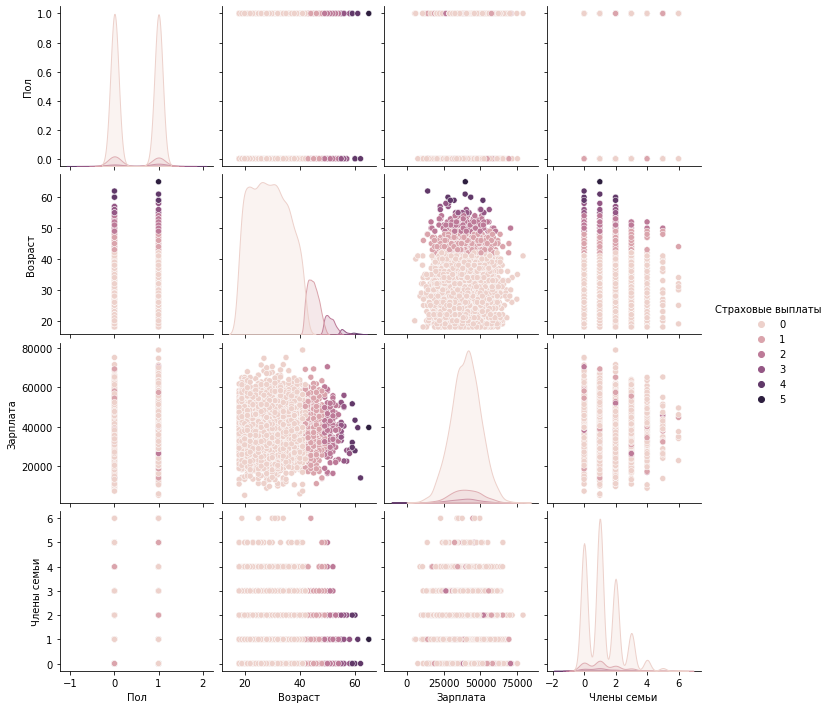

In [6]:
sns.pairplot(data, hue='Страховые выплаты');

Есть значительная корреляция между возрастом страховщика и целевым признаком, что также видно на графиках. Остальные признаки между собой имеют крайне слабую или вовсе отсутствующую корреляцию. Каких-то аномалий в данных не выявлено.

In [7]:
features_before = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Если умножить признаки на обратимую матрицу, и обучить модель линейной регрессии на полученных данных, метрики модели не изменятся.

**Обоснование:** На основании свойств матриц
$$
(AB)^T = B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
AA^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$

Докажем, что прогнозы модели на исходных признаках равны прогнозам модели на признаках, умноженных на обратимую матрицу

$$
a = a'
$$
$$
a = Xw
$$
$$
a' = X'w' = XPw'
$$

Преобразуем уравнения.

$$
w = (X^T X)^{-1} X^T y
$$
$$
w' = ((XP)^T (XP))^{-1} XP^T y
$$
$$
w' = (P^T X^T XP)^{-1} P^T X^T y
$$
$$
w' = (P^T (X^T X)P)^{-1} P^T X^T y
$$
$$
w = P^{-1} (X^T X)^{-1} X^T y
$$
$$
Xw = XP'w'
$$
$$
w' = P^{-1} w
$$
из чего следует

$$
a = a'
$$

Из этого следует, что при умножении признаков на обратимую матрицу прогнозы линейной регрессии не должны меняться.

## Алгоритм преобразования

**Алгоритм**

Сгенерируем случайную матрицу размером 4х4

In [8]:
r = np.random.RandomState(12345)
matrix = r.normal(size=(4,4))
print(matrix)

[[-0.20470766  0.47894334 -0.51943872 -0.5557303 ]
 [ 1.96578057  1.39340583  0.09290788  0.28174615]
 [ 0.76902257  1.24643474  1.00718936 -1.29622111]
 [ 0.27499163  0.22891288  1.35291684  0.88642934]]


In [9]:
#проверка на обратимость
print(np.linalg.inv(matrix))

[[-1.31136747  0.3921804   0.18868055 -0.67088287]
 [ 1.75872714  0.14106138 -0.17773045  0.79787127]
 [-0.41702659 -0.22854768  0.3550602   0.33039819]
 [ 0.58912996  0.19073027 -0.5545481   0.6259302 ]]


**Обоснование**

np.linalg.inv() выдал результат, значит матрица matrix - обратимая. Теперь можно умножить матрицу признаков на нее.

In [10]:
features_after = features_before@matrix
print(features_after)

                 0             1             2             3
0     38224.186641  61881.000420  49961.234837 -64280.684721
1     29313.558467  47428.845564  38278.822267 -49242.555394
2     16206.481556  26215.538233  21153.670838 -27212.472653
3     32110.072445  52006.047856  42004.453110 -54044.730722
4     20126.326163  32571.440926  26289.724215 -33824.037786
...            ...           ...           ...           ...
4995  27509.697503  44537.193278  35961.967320 -46265.431844
4996  40363.894074  65360.784898  52781.234122 -67911.520319
4997  26109.730637  42282.463506  34148.283213 -43934.487817
4998  25190.905401  40790.236490  32940.675278 -42378.128295
4999  31277.428385  50644.973517  40895.322817 -52618.357439

[5000 rows x 4 columns]


## Проверка алгоритма

In [11]:
model_before = LinearRegression()
model_before.fit(features_before, target)
predictions_before = model_before.predict(features_before)
print(r2_score(target, predictions_before))

model_after = LinearRegression()
model_after.fit(features_after, target)
predictions_after = model_after.predict(features_after)
print(r2_score(target, predictions_after))

0.4249455028666801
0.42494550286667687


Результаты сошлись до 13-ого знака после запятой, что можно считать полным совпадением. Соответсвенно, вывод, сделанный на втором шаге, подтвержден - если умножить матрицу признаков на обратимую матрицу, и обучить модель линейной регрессии на полученных зашифрованных данных, предсказания и, соответственно, метрики модели не изменятся.

In [12]:
#проверка дешифровки
features_decoded = features_after@np.linalg.inv(matrix)
print(mean_squared_error(features_decoded, features_before))

2.1575248801088863e-23


In [14]:
display(features_before)
display(round(features_decoded))

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,-0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,-0.0
3,-0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,-0.0
...,...,...,...,...
4995,-0.0,28.0,35700.0,2.0
4996,0.0,34.0,52400.0,1.0
4997,-0.0,20.0,33900.0,2.0
4998,1.0,22.0,32700.0,3.0


После дешифровки в некоторых признаках появилась погрешность, из-за которой MSE не равно нулю. Тем не менее ничтожно малое MSE говорит о том, что дешифровка прошла успешно и признаки можно восстановить с помощью ключа. Погрешность легко устраняется либо округлением значений, либо преобразованием данных в формат 'int'.